# Python 1 Workshop (Instructor Version)

Now that most of you have learned the basics of Python (variables, types, strings, data structures, loops, and functions) from our Python 0 workshop, we are ready to dive in to some more advanced Python topics. In this workshop we will learn how to use Python for data science, and introduce you to the basics of data science in Python. 

# Data Science Tutorial
Now that we've covered some Python basics, we will begin a tutorial going through many tasks a data scientist may perform.  We will obtain real world data and go through the process of auditing, analyzing, visualing, and building classifiers from the data.

We will use a database of selected disease statistics of various contries from the Global Health Observatory. The data is organized by country and year, with the number of specific incidents of each disease listed. The attributes and domain of each entry are described by the table below:

| Attribute                     | Domain                          |
|-------------------------------|---------------------------------|
| 1. Country                    | String                          |
| 2. Year                       | Year (2009-2014)                |
| 3. T.b. gambiense             | Integer                         |
| 4. T.b. rhodesiense           | Integer                         |
| 5. Cholera                    | Integer                         |
| 6. Meningitis (suspected)     | Integer                         |
| 7. Congenital Rubella         | Integer                         |
| 8. Diphtheria                 | Integer                         |
| 9. Japanese encephalitis      | Integer                         |
| 10. Leprosy                   | Integer                         |
| 11. Malaria                   | Integer                         |
| 12. Measles                   | Integer                         |
| 13. Mumps                     | Integer                         |
| 14. Neonatal Tetanus          | Integer                         |
| 15. Pertussis                 | Integer                         |
| 16. Plague                    | Integer                         |
| 17. Poliomyelitis             | Integer                         |
| 18. Rubella                   | Integer                         |
| 19. Total Tetanus             | Integer                         |
| 20. Tuberculosis              | Integer                         |
| 21. Yellow Fever              | Integer                         |
| 22. Cutaneous Leishmaniasis   | Integer                         |
| 23. Visceral Leishmaniasis    | Integer                         |

For more information on this data set:
http://apps.who.int/gho/data/node.home

##Obtaining the Data
Lets begin by programmatically obtaining the data.  Here I'll define a function we can use to make HTTP requests and download the data

In [6]:
def download_file(url, local_filename):
    import requests
    
    # stream = True allows downloading of large files; prevents loading entire file into memory
    r = requests.get(url, stream = True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                f.flush()

Now we'll specify the url of the file and the file name we will save to

In [7]:
url = 'https://raw.githubusercontent.com/dsiufl/Python-Workshops/master/GlobalHealthData.csv'
filename = 'GlobalHealthData.csv'

And make a call to <code>download_file</code>

In [8]:
download_file(url, filename)

**Note:**  If you see an InsecurePlatformWarning message, ignore it. More info can be found here: https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning

Now this might seem like overkill for downloading a single, small csv file, but we can use this same function to access countless APIs available on the World Wide Web by building an API request in the url.

##Wrangling the Data
Now that we have some data, lets get it into a useful form.  For this task we will use a package called pandas. pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python.  The most fundamental data structure in pandas is the dataframe, which is similar to the data.frame data structure found in the R statistical programming language.

For more information: http://pandas.pydata.org

pandas dataframes are a 2-dimensional labeled data structures with columns of potentially different types.  Dataframes can be thought of as similar to a spreadsheet or SQL table.

There are numerous ways to build a dataframe with pandas.  Since we have already attained a csv file, we can use a parser built into pandas called <code>read_csv</code> which will read the contents of a csv file directly into a data frame.

For more information: http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html

In [9]:
import pandas as pd # import the module and alias it as pd

health_data = pd.read_csv('GlobalHealthData.csv')
health_data.head() # show the first few rows of the data

,Country,Year,Number of new reported cases of human African trypanosomiasis (T.b. gambiense),Number of new reported cases of human African trypanosomiasis (T.b. rhodesiense),Number of reported cases of cholera,Number of suspected meningitis cases reported,Congenital Rubella Syndrome - number of reported cases,Diphtheria - number of reported cases,Japanese encephalitis - number of reported cases,Leprosy - number of reported cases,...,Neonatal tetanus - number of reported cases,Pertussis - number of reported cases,Plague - number of reported cases,Poliomyelitis - number of reported cases,Rubella - number of reported cases,Total tetanus - number of reported cases,Tuberculosis - new and relapse cases,Yellow fever - number of reported cases,Number of cases of cutaneous leishmaniasis reported,Number of cases of visceral leishmaniasis reported
0,Afghanistan,2014,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,17,0,NaN,28.0,43,39,NaN,NaN,NaN,NaN
1,Afghanistan,2013,NaN,NaN,3957.0,NaN,0.0,0.0,0.0,39,...,13,371,NaN,17.0,367,24,30507.0,0,23621,16
2,Afghanistan,2012,NaN,NaN,12.0,NaN,NaN,0.0,NaN,37,...,21,1497,NaN,37.0,NaN,37,28679.0,NaN,33894,24
3,Afghanistan,2011,NaN,NaN,3733.0,NaN,NaN,0.0,NaN,50,...,20,0,NaN,80.0,750,20,27983.0,NaN,31293,21
4,Afghanistan,2010,NaN,NaN,2369.0,NaN,0.0,0.0,0.0,51,...,23,0,NaN,25.0,46,23,28029.0,0,32145,11


Lets take a look at some simple statistics for the **Cholera** column

In [10]:
health_data["Number of reported cases of cholera"].describe()

count       245.000000
mean       6134.971429
std       26976.057407
min           1.000000
25%          15.000000
50%         219.000000
75%        1864.000000
max      340311.000000
Name: Number of reported cases of cholera, dtype: float64

Referring to the documentation, the data contains 1164 entries. However, if we take a look at the "count" section, it shows only 245 entries. This is because the original data is filled with empty strings, which pandas automatically converts to Numpy's <code>nan</code> datatype, or "Not a Number". 

Lets take a look at another column, this time **Pertussis**

In [11]:
health_data["Pertussis - number of reported cases"].describe()

count     972
unique    374
top         0
freq      333
Name: Pertussis - number of reported cases, dtype: object

Well at least the name is correct.  We were expecting a mean and standard deviation, and now the data type is an object.  

Whats up with our data?

We have arrived at arguably the most important part of performing data science: dealing with messy data.  One of most important tools in a data scientist's toolbox is the ability to audit, clean, and reshape data.  The real world is full of messy data and your sources may not always have data in the exact format you desire.

In this case we are working with csv data, which is a relatively straightforward format, but this will not always be the case when performing real world data science.  Data comes in all varieties from csv all the way to something as unstructured as a collection of emails or documents.  A data scientist must be versed in a wide variety of technologies and methodologies in order to be successful.

Now, lets do a little bit of digging into why were are not getting a numeric pandas column

In [12]:
health_data["Pertussis - number of reported cases"].unique()

array(['0', '371', '1497', nan, '6', '16', '4', '10', '69', '104', '1',
       '3', '1259', '1554', '2539', '1127', '561', '1112', '1239', '1594',
       '804', '1743', '85', '30', '8', '11', '11842', '12319', '23855',
       '38040', '34285', '29545', '571', '309', '414', '183', '18', '27',
       '15', '5', '12', '13', '44', '17', '378', '188', '576', '151',
       '112', '93', '1501', '1142', '548', '103', '133', '53', '75', '31',
       '19', '25', '7687', '5211', '5400', '2257', '477', '1037', '52',
       '89', '102', '46', '54', '251', '7', '68', '372', '513', '1527',
       '1261', '4845', '676', '759', '1667', '241', '124', '100', '63',
       '1964', '5762', '2582', '794', '692', '3408', '1712', '2183',
       '2517', '1764', '1612', '734', '13682', '3289', '1010', '344',
       '407', '21', '137', '58', '130', '79', '71', '664', '108', '61',
       '42', '101', '9', '2', '2521', '1233', '738', '324', '662', '956',
       '3108', '3407', '2452', '2157', '830', '855', '484', '

Using <code>unique</code> we can see that '0 0', '5 5', and '2 2' all appear as distinct values in this series. Because of the space between the numbers, Python has classified these as *strings* rather than *integers*. Indeed, it's not immediately obvious that these were meant to be legitimate entries in the first place.

Lets see what we can do with these unrecognized values. 

In [13]:
health_data["Pertussis - number of reported cases"] = health_data["Pertussis - number of reported cases"].convert_objects(convert_numeric=True)

Here we have attempted to convert the **Pertussis** series to a numeric type.  Lets see what the unique values are now.

In [14]:
health_data["Pertussis - number of reported cases"].unique()

array([  0.00000000e+00,   3.71000000e+02,   1.49700000e+03,
                    nan,   6.00000000e+00,   1.60000000e+01,
         4.00000000e+00,   1.00000000e+01,   6.90000000e+01,
         1.04000000e+02,   1.00000000e+00,   3.00000000e+00,
         1.25900000e+03,   1.55400000e+03,   2.53900000e+03,
         1.12700000e+03,   5.61000000e+02,   1.11200000e+03,
         1.23900000e+03,   1.59400000e+03,   8.04000000e+02,
         1.74300000e+03,   8.50000000e+01,   3.00000000e+01,
         8.00000000e+00,   1.10000000e+01,   1.18420000e+04,
         1.23190000e+04,   2.38550000e+04,   3.80400000e+04,
         3.42850000e+04,   2.95450000e+04,   5.71000000e+02,
         3.09000000e+02,   4.14000000e+02,   1.83000000e+02,
         1.80000000e+01,   2.70000000e+01,   1.50000000e+01,
         5.00000000e+00,   1.20000000e+01,   1.30000000e+01,
         4.40000000e+01,   1.70000000e+01,   3.78000000e+02,
         1.88000000e+02,   5.76000000e+02,   1.51000000e+02,
         1.12000000e+02,

The decimal point after each number means that it is an integer value being represented by a floating point number.  Now instead of our pesky *strings* we have <code>nan</code> (not a number).  <code>nan</code> is a construct used by pandas to represent the absence of value.  It is a data type that comes from the package numpy, used internally by pandas, and is not part of the standard Python library.

Now that we have <code>nan</code> values in place of strings, we can use some nice features in pandas to deal with these missing values.

What we are about to do is what is called "imputing" or providing a replacement for missing values so the data set becomes easier to work with.  There are a number of strategies for imputing missing values, all with their own pitfalls.  In general, imputation introduces some degree of bias to the data, so the imputation strategy taken should be in an attempt to minimize that bias.

Here, we will simply ignore all of the <code>nan</code> values, however other strategies such as replacing the <code>nan</code>'s with the mean of the data are also commonly used.

In [15]:
health_data = health_data.convert_objects(convert_numeric=True)
health_data["Pertussis - number of reported cases"].unique()

array([  0.00000000e+00,   3.71000000e+02,   1.49700000e+03,
                    nan,   6.00000000e+00,   1.60000000e+01,
         4.00000000e+00,   1.00000000e+01,   6.90000000e+01,
         1.04000000e+02,   1.00000000e+00,   3.00000000e+00,
         1.25900000e+03,   1.55400000e+03,   2.53900000e+03,
         1.12700000e+03,   5.61000000e+02,   1.11200000e+03,
         1.23900000e+03,   1.59400000e+03,   8.04000000e+02,
         1.74300000e+03,   8.50000000e+01,   3.00000000e+01,
         8.00000000e+00,   1.10000000e+01,   1.18420000e+04,
         1.23190000e+04,   2.38550000e+04,   3.80400000e+04,
         3.42850000e+04,   2.95450000e+04,   5.71000000e+02,
         3.09000000e+02,   4.14000000e+02,   1.83000000e+02,
         1.80000000e+01,   2.70000000e+01,   1.50000000e+01,
         5.00000000e+00,   1.20000000e+01,   1.30000000e+01,
         4.40000000e+01,   1.70000000e+01,   3.78000000e+02,
         1.88000000e+02,   5.76000000e+02,   1.51000000e+02,
         1.12000000e+02,

<code>health_data.mean().round()</code> will take the mean of each column (this computation ignores the currently present nan values), then round, and return a dataframe indexed by the columns of the original dataframe.

This function can be used to replace all missing values with the mean of each column. In this tutorial however, we will not use this method, because the large number of missing values would greatly skew our standard deviations.

In [16]:
health_data.mean().round()

Year                                                                                  2012.0
Number of new reported cases of human African trypanosomiasis (T.b. gambiense)         370.0
Number of new reported cases of human African trypanosomiasis (T.b. rhodesiense)        21.0
Number of reported cases of cholera                                                   6135.0
Number of suspected meningitis cases reported                                         2175.0
Congenital Rubella Syndrome - number of reported cases                                   1.0
Diphtheria - number of reported cases                                                   33.0
Japanese encephalitis - number of reported cases                                        48.0
Leprosy - number of reported cases                                                    1949.0
Malaria - number of reported confirmed cases                                        316480.0
Measles - number of reported cases                                    

Now that we have figured out how to impute these missing values, lets start over and quickly apply this technique to the entire dataframe.

In [17]:
health_data = pd.read_csv('GlobalHealthData.csv')
health_data = health_data.convert_objects(convert_numeric=True)
health_data["Tuberculosis - new and relapse cases"].describe()

count    9.480000e+02
mean     3.055099e+04
std      1.227259e+05
min      0.000000e+00
25%      3.650000e+02
50%      3.236000e+03
75%      1.207825e+04
max      1.351913e+06
Name: Tuberculosis - new and relapse cases, dtype: float64

In [18]:
health_data["Tuberculosis - new and relapse cases"].unique()

array([             nan,   3.05070000e+04,   2.86790000e+04,
         2.79830000e+04,   2.80290000e+04,   2.61500000e+04,
         4.74000000e+02,   4.08000000e+02,   4.22000000e+02,
         4.31000000e+02,   4.45000000e+02,   2.07010000e+04,
         2.18800000e+04,   2.14290000e+04,   2.23360000e+04,
         2.17010000e+04,   5.00000000e+00,   9.00000000e+00,
         3.00000000e+00,   7.00000000e+00,   8.00000000e+00,
         5.86070000e+04,   5.18190000e+04,   4.72400000e+04,
         4.46550000e+04,   4.12210000e+04,   1.00000000e+01,
         6.00000000e+00,   8.93300000e+03,   8.75800000e+03,
         9.73300000e+03,   7.33600000e+03,   7.70100000e+03,
         1.39700000e+03,   1.21300000e+03,   1.26100000e+03,
         1.41000000e+03,   1.56000000e+03,   1.25000000e+03,
         1.30500000e+03,   1.23900000e+03,   1.25700000e+03,
         1.29400000e+03,   6.24000000e+02,   6.20000000e+02,
         6.73000000e+02,   6.62000000e+02,   6.63000000e+02,
         5.86000000e+03,

Structurally, Pandas dataframes are a collection of Series objects sharing a common index.  In general, the Series object and Dataframe object share a large number of functions with some behavioral differences.  In other words, whatever computation you can do on a single column can generally be applied to the entire dataframe.

Now we can use the dataframe version of <code>describe</code> to get an overview of all of our data

In [19]:
health_data.describe()

,Year,Number of new reported cases of human African trypanosomiasis (T.b. gambiense),Number of new reported cases of human African trypanosomiasis (T.b. rhodesiense),Number of reported cases of cholera,Number of suspected meningitis cases reported,Congenital Rubella Syndrome - number of reported cases,Diphtheria - number of reported cases,Japanese encephalitis - number of reported cases,Leprosy - number of reported cases,Malaria - number of reported confirmed cases,...,Neonatal tetanus - number of reported cases,Pertussis - number of reported cases,Plague - number of reported cases,Poliomyelitis - number of reported cases,Rubella - number of reported cases,Total tetanus - number of reported cases,Tuberculosis - new and relapse cases,Yellow fever - number of reported cases,Number of cases of cutaneous leishmaniasis reported,Number of cases of visceral leishmaniasis reported
count,1164.000000,109.000000,36.000000,245.000000,96.000000,749.000000,953.000000,487.000000,588.000000,5.030000e+02,...,963.000000,962.000000,33.000000,970.000000,1010.000000,1008.000000,9.480000e+02,789.000000,244.000000,246.000000
mean,2011.500000,369.844037,21.444444,6134.971429,2175.250000,1.311081,32.569780,47.926078,1949.170068,3.164803e+05,...,27.439252,1095.180873,27.545455,3.189691,535.100990,71.886905,3.055099e+04,5.012674,4099.094262,901.495935
std,1.708559,1291.601046,32.574700,26976.057407,6133.867934,9.397670,322.362516,287.843712,12400.256473,7.290974e+05,...,124.042240,4768.084078,74.925835,26.790189,3970.447112,303.368764,1.227259e+05,45.072388,9779.236568,3670.883278
min,2009.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2010.000000,0.000000,1.750000,15.000000,266.000000,0.000000,0.000000,0.000000,3.000000,4.250000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.650000e+02,0.000000,10.000000,2.000000
50%,2011.500000,10.000000,5.500000,219.000000,468.500000,0.000000,0.000000,0.000000,36.000000,1.521200e+04,...,0.000000,16.000000,0.000000,0.000000,4.000000,2.000000,3.236000e+03,0.000000,437.000000,17.500000
75%,2013.000000,87.000000,29.750000,1864.000000,1208.000000,0.000000,0.000000,0.000000,382.250000,2.460685e+05,...,3.000000,220.750000,5.000000,0.000000,56.750000,17.000000,1.207825e+04,0.000000,2501.750000,110.000000
max,2014.000000,7183.000000,129.000000,340311.000000,56128.000000,189.000000,6094.000000,3913.000000,134752.000000,6.715223e+06,...,1412.000000,60385.000000,313.000000,460.000000,69860.000000,5017.000000,1.351913e+06,1024.000000,71996.000000,33155.000000


# Visualizing the Data
Another important tool in the data scientist's toolbox is the ability to create visualizations from data.  Visualizing data is often the most logical place to start getting a deeper intuition of the data.  This intuition will shape and drive your analysis.

Even more important than visualizing data for your own personal benefit, it is often the job of the data scientist to use the data to tell a story.  Creating illustrative visuals that succinctly convey an idea are the best way to tell that story, especially to stakeholders with less technical skillsets.

Here we will be using a Python package called ggplot (https://ggplot.yhathq.com).  The ggplot package is an attempt to bring visuals following the guidelines outlayed in the grammar of graphics (http://vita.had.co.nz/papers/layered-grammar.html) to Python.  It is based off of and intended to mimic the features of the ggplot2 library found in R.  Additionally, ggplot is designed to work with Pandas dataframes, making things nice and simple. 

We'll start by doing a bit of setup

If you are using a Mac, try installing ggplot by opening the terminal and running the command "pip install ggplot"

For Windows users, try opening the anaconda terminal and running the same command, or the command "conda install ggplot"

In [20]:
# The following line is NOT Python code, but a special syntax for enabling inline plotting in IPython
%matplotlib inline 

from ggplot import *

import warnings

# ggplot usage of pandas throws a future warning
warnings.filterwarnings('ignore')

So we enabled plotting in IPython and imported everything from the ggplot package.  Now we'll create a plot and then break down the components

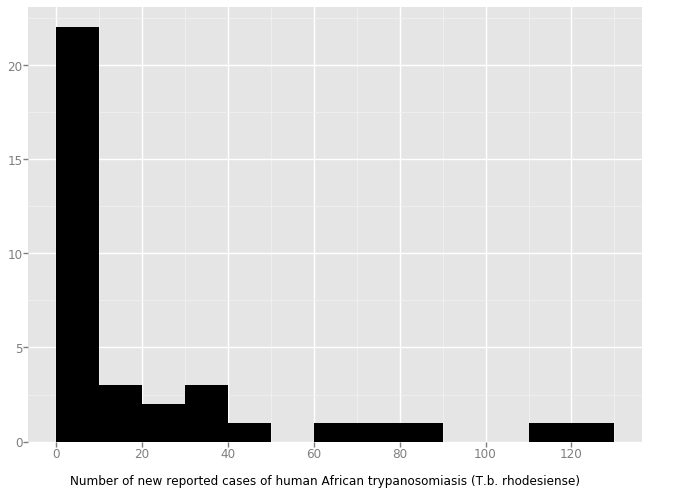

<ggplot: (299741305)>


In [106]:
plt = ggplot(aes(x = 'Number of new reported cases of human African trypanosomiasis (T.b. rhodesiense)'), data = health_data) + \
        geom_histogram(binwidth = 10, fill = 'black')

# using print gets the plot to show up here within the notebook.  
# In normal Python environment without using print, the plot appears in a window
print plt

A plot begins with the <code>ggplot</code> function.  Here, we pass in the cancer_data pandas dataframe and a special function called <code>aes</code> (short for aesthetic).  The values provided to <code>aes</code> change depending on which type of plot is being used.  Here we are going to make a histogram from the **human African trypanosomiasis (T.b. rhodesiense)** column in health_data, so that column name needs to be passed as the x parameter to <code>aes</code>.

The grammar of graphics is based off of a concept of "geoms" (short for geometric objects).  These geoms provide granular control of the plot and are progressively added to the base call to <code>ggplot</code> with + syntax.


Lets say we wanted to show the mean number of cases on this plot.  We could do something like the following

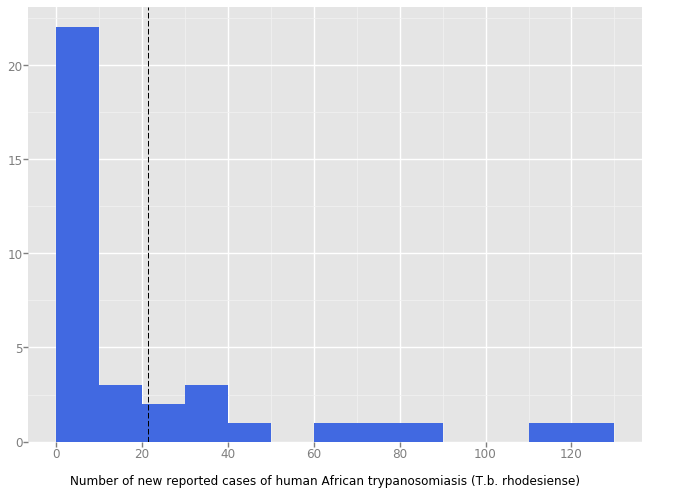

<ggplot: (299511465)>


In [105]:
plt = ggplot(aes(x = 'Number of new reported cases of human African trypanosomiasis (T.b. rhodesiense)'), data = health_data) + \
        geom_histogram(binwidth = 10, fill = 'royalblue') + \
        geom_vline(x = [health_data['Number of new reported cases of human African trypanosomiasis (T.b. rhodesiense)'].mean()], linetype = 'dashed')
print plt

As you can see, each geom has its own set of parameters specific to the appearance of that geom (also called aesthetics).

Lets try a scatter plot to get some multi-variable action

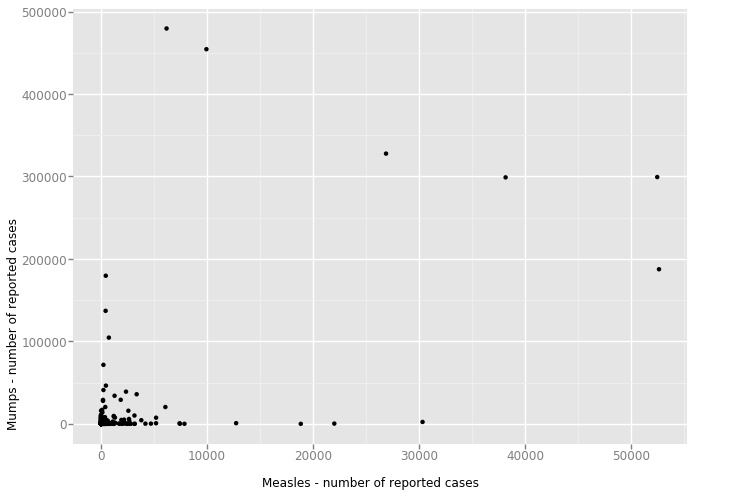

<ggplot: (274255261)>


In [26]:
plt = ggplot(aes(x = 'Measles - number of reported cases', y = 'Mumps - number of reported cases'), data = health_data) + \
        geom_point()
print plt

With a simple aesthetic addition, we can see how these two variables have changed over the past six years.

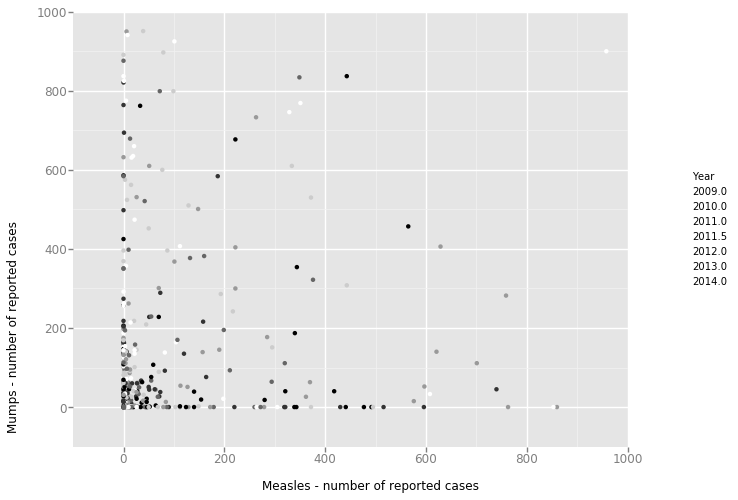

<ggplot: (293467209)>


In [99]:
plt = ggplot(aes(x = 'Measles - number of reported cases', y = 'Mumps - number of reported cases', color = 'Year'), data = health_data) + \
        geom_point() + xlim(-100,1000) + ylim(-100, 1000) + \
        scale_color_gradient(low="white", high="black")
print plt

Similar to the vline geom we added to our histogram, we can also add an abline geom. The vline and hline geoms are fixed in some way (plot vertical lines with vline and horizontal lines with hline) but the abline geom can be used to plot a line of any slope or intercept. 

Here, we are going to use it to see how our scatter plot compares to the line y=x. It's not exactly too useful for our plot, but it can be useful for other plots you decide to make, such as plotting a best fit line against a linear plot!

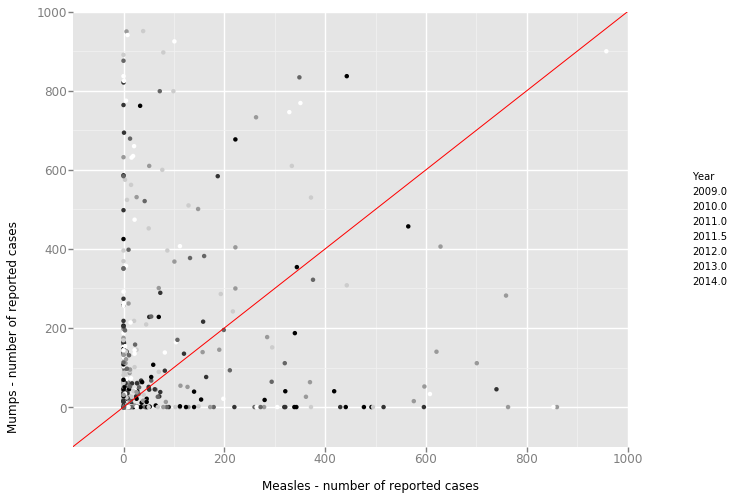

<ggplot: (299866473)>


In [109]:
plt = ggplot(aes(x = 'Measles - number of reported cases', y = 'Mumps - number of reported cases', color = 'Year'), data = health_data) + \
        geom_point() + xlim(-100,1000) + ylim(-100, 1000) + \
        scale_color_gradient(low="white", high="black") + \
        geom_abline(slope=1, intercept=0, color='red')
print plt

By adding <code> color = 'Year' </code> as a parameter to the aes function, we now give a color to each unique value found in that column and automatically get a legend. By adding <code> xlim </code> and <code> ylim </code> we can set our x and y-axis limits and focus on a specific portion of the plot.

We can also do things such as add a title or change the axis labeling with geoms

To see more ways you can edit your plots, check out this link: http://yhat.github.io/ggpy/

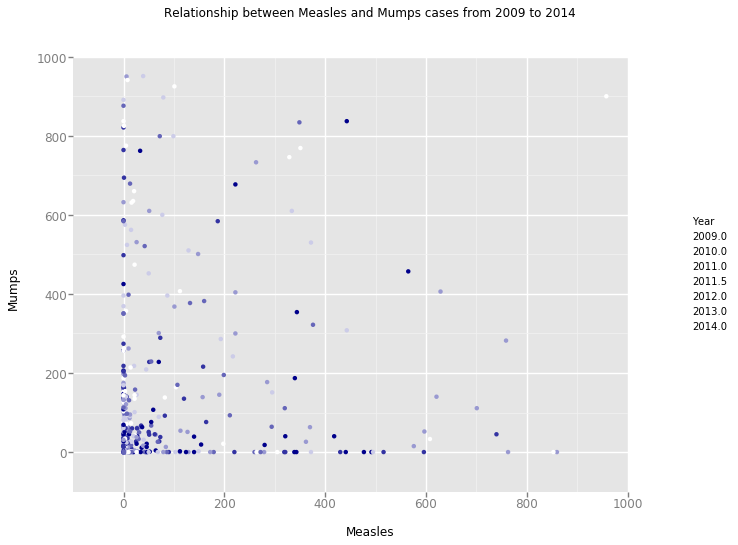

<ggplot: (299372309)>


In [103]:
plt = ggplot(aes(x = 'Measles - number of reported cases', y = 'Mumps - number of reported cases', color = 'Year'), data = health_data) + \
        geom_point() + xlim(-100,1000) + ylim(-100, 1000) +\
        scale_color_gradient(low="white", high="darkblue") +\
        ggtitle("Relationship between Measles and Mumps cases from 2009 to 2014") + \
        xlab("Measles") + \
        ylab("Mumps")
print plt

Note: I highly encourage you to check out https://ggplot.yhathq.com/docs/index.html to see all of the available geoms.  The best way to learn is to play with and visualize the data with many different plots and aesthetics.

There doesn't seem to be much correlation between these two variables as a function of the year, however it is difficult to say with such simple statistics. If we wanted to analyze relationships between all of the variables in our data set, we would need to analyze a very high-dimensional space. Using some more complex data analysis and machine learning techniques, we may be able to extract higher order correlations in this high-dimensional data space. This will be the topic of our next workshop, Python II.

# Summary and Python II

In the second part of our three-part Python series, we've learned about variables, data structures, functions, and graphing. While we have introduced these topics in the context of data science with Python, they are central to programming in any language and in any context. We have also laid the foundation for programmatically obtaining, cleaning, and visualizing data sets.

Now that we have an understanding of how to obtain and visualize some simple statistical information contained in a dataset, we've set the stage for machine learning and data analysis. These topics will be covered in depth in our next workshop, Python II.

Please fill out the post workshop survey posted on the Facebook event page!

Don't forget about our next workshop, Python 2, and our upcoming workshops this semester, including the R workshop series, sports data analysis in R, Data Visualization in Python, and more!